In [9]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last' #all last

import pandas as pd
import numpy as np
import os, sys
sys.path.append('F:\my_documnet_F')
sys.path.append('C:\Program Files\Java\jdk-18.0.2.1\bin\server')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from importlib import reload
plt=reload(plt)
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import datetime
import seaborn as sns
from scipy import sparse
# import mglearn

from konlpy.tag import Okt
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import re, logging
from logging.handlers import RotatingFileHandler
import time

import warnings
warnings.filterwarnings("ignore")

#Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2
import matplotlib.ticker as ticker

import imp
import Library.Rawdata_stack as rawstack
imp.reload(rawstack)

<module 'Library.Rawdata_stack' from 'F:\\my_documnet_F\\Library\\Rawdata_stack.py'>

In [2]:
# brew 로 설치된 chromedriver의 path (Mac)
# path = "./chromedriver"

# 윈도우용 크롬 웹드라이버 실행 경로 (Windows)
path = "F:/my_documnet_F/crawring/chromedriver/chromedriver.exe"

# 크롤링할 사이트 주소를 정의합니다.
source_url = "https://map.kakao.com/"

# 크롬 드라이버를 사용합니다 (맥은 첫 줄, 윈도우는 두번째 줄 실행)
# driver = webdriver.Chrome(path)
driver = webdriver.Chrome(path)

# 카카오 지도에 접속합니다
driver.get(source_url)

# 검색창에 검색어를 입력합니다
searchbox = driver.find_element(By.XPATH, "//input[@id='search.keyword.query']")
# searchbox.send_keys("강남역 고기집")
searchbox.send_keys("강남역 횟집")

# 검색버튼을 눌러서 결과를 가져옵니다
searchbutton = driver.find_element(By.XPATH, "//button[@id='search.keyword.submit']")
driver.execute_script("arguments[0].click();", searchbutton)

# 검색 결과를 가져올 시간을 기다립니다
time.sleep(2)

# /html/body/div[5]/div[2]/div[1]/div[7]/div[5]/a
# for i in range(3):
#     try:
#         another_reviews = driver.find_element(By.XPATH,"/html/body/div[5]/div[2]/div[1]/div[7]/div[5]/a")
#         another_reviews.click()
#         time.sleep(1)
#         # break
#     except:
#         continue

# 검색 결과의 페이지 소스를 가져옵니다
html = driver.page_source

# BeautifulSoup을 이용하여 html 정보를 파싱합니다
soup = BeautifulSoup(html, "html.parser")
moreviews = soup.find_all(name="a", attrs={"class":"moreview"})

# a태그의 href 속성을 리스트로 추출하여, 크롤링 할 페이지 리스트를 생성합니다.
page_urls = []
for moreview in moreviews:
    page_url = moreview.get("href")
    print(page_url)
    page_urls.append(page_url)

try:
    another_reviews = driver.find_element(By.XPATH,"/html/body/div[5]/div[2]/div[1]/div[7]/div[5]/a")
    another_reviews.click()
    time.sleep(1)
    # break
except:
    next    

# 검색 결과의 페이지 소스를 가져옵니다
html = driver.page_source

# BeautifulSoup을 이용하여 html 정보를 파싱합니다
soup = BeautifulSoup(html, "html.parser")
moreviews = soup.find_all(name="a", attrs={"class":"moreview"})    

for moreview in moreviews:
    page_url = moreview.get("href")
    print(page_url)
    page_urls.append(page_url)
# 크롤링에 사용한 브라우저를 종료합니다.
driver.close()

https://place.map.kakao.com/27254228
https://place.map.kakao.com/1844312235
https://place.map.kakao.com/26921715
https://place.map.kakao.com/21155020
https://place.map.kakao.com/21442694
https://place.map.kakao.com/1123017733
https://place.map.kakao.com/2024917014
https://place.map.kakao.com/25702695
https://place.map.kakao.com/8008437
https://place.map.kakao.com/16062979
https://place.map.kakao.com/8504621
https://place.map.kakao.com/1041883963
https://place.map.kakao.com/101140689
https://place.map.kakao.com/16705705
https://place.map.kakao.com/439888952
https://place.map.kakao.com/27254228
https://place.map.kakao.com/1844312235
https://place.map.kakao.com/26921715
https://place.map.kakao.com/21155020
https://place.map.kakao.com/21442694
https://place.map.kakao.com/1123017733
https://place.map.kakao.com/2024917014
https://place.map.kakao.com/25702695
https://place.map.kakao.com/8008437
https://place.map.kakao.com/16062979
https://place.map.kakao.com/8504621
https://place.map.kakao.co

In [3]:
columns = ['score', 'review']
df_shop = pd.DataFrame(columns=columns)
dic_shop = {}

# driver = webdriver.Chrome(path)  # for Mac
driver = webdriver.Chrome(executable_path=path)  # for Windows
for page_url in page_urls:
    
    # 상세보기 페이지에 접속합니다
    driver.get(page_url)
    time.sleep(2)
    
    # 첫 페이지 리뷰를 크롤링합니다
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
#     contents_div = soup.find(name="div", attrs={"class":"ahead_info"})
    mailshop = soup.find(name="div", attrs={"class":"inner_place"}).find_all('h2')[0].get_text()
    dic_shop[mailshop] = [page_url]
    
    for k in range(3):    
        for i in [7, 8]:
            for j in [2, 3]:
                try:
                    another_reviews = driver.find_element(By.XPATH,"/html/body/div[2]/div[2]/div[2]/div[" + str(i) + "]/div[" + str(j) + "]/a/span[1]")
                    another_reviews.click()
                    time.sleep(1)
                    break
                except:
                    continue
                
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    try:
        contents_list = soup.find(name="div", attrs={"class":"evaluation_review"}).find_all('li')
    except:
        continue
    
    for i, k in enumerate(contents_list):
        # print(i)
        try:
            score = k.find('div', attrs={'class':'unit_info'}).find_all('span', attrs={'class':'txt_desc'})[1].get_text()
        except:
            score = ''
        # print(score)
        try:
            comment = k.find('div', attrs={'class':'comment_info'}).find_all(name="p", attrs={"class":"txt_comment"})[0].get_text() # url
        except:
            comment = ''
        # print(score, comment)
        dic_shop[mailshop].append([score, comment])
            
        

In [4]:
columns = ['shop_name', 'url', 'score', 'comment']
df_shop = pd.DataFrame(columns=columns)

In [5]:
for i, k in enumerate(dic_shop.keys()):
    for j, l in enumerate(dic_shop[k]):
        # print(l, k)
        if j == 0:
            url_shop = l
            continue
        # df_shop.iloc[[i * j - 1], [0]] = k
        # df_shop.iloc[[i * j - 1], [1]] = url_shop
        # df_shop.iloc[[i * j - 1], [2]] = l[0]
        # df_shop.iloc[[i * j - 1], [3]] = l[1]
        row = [k, url_shop, l[0], l[1]]
        series = pd.Series(row, index=df_shop.columns)
        df_shop = df_shop.append(series, ignore_index=True)


In [6]:
df_shop['score'] = df_shop['score'].replace('', np.nan).astype(float)
df_shop = df_shop[~df_shop['score'].isna()]

In [7]:
# 함수를 적용하여 리뷰에서 한글만 추출합니다.

df_shop['ko_text'] = df_shop['comment'].apply(lambda x: rawstack.text_cleaning(x))
del df_shop['comment']

# 한 글자 이상의 텍스트를 가지고 있는 데이터만 추출합니다
# df_shop = df_shop[df_shop['ko_text'].str.len() > 0]
df_shop.head()

,shop_name,url,score,ko_text
0,자매수산 1호점,https://place.map.kakao.com/27254228,3.5,회에서 가시가 계속 나왔다 싸다고 넘어갈 가격도 아니니 그냥 아예 저렴함 곳 가거나...
2,자매수산 1호점,https://place.map.kakao.com/27254228,4.5,더보기
5,자매수산 1호점,https://place.map.kakao.com/27254228,3.9,방어가 그립다더보기
8,만원수산,https://place.map.kakao.com/1844312235,3.6,회 나쁘지 않고 술도 싼편 강남역 횟집중에서 가성비가 상당히 괜찮은 곳임더보기
10,만원수산,https://place.map.kakao.com/1844312235,4.3,더보기


In [52]:
# 형태소 추출 동작을 테스트합니다.
result = rawstack.get_pos(df_shop['ko_text'].values[3])
print(result)

['회/Noun', '나쁘지/Adjective', '않고/Verb', '술/Noun', '도/Josa', '싼/Verb', '편/Noun', '강남역/Noun', '횟집/Noun', '중/Suffix', '에서/Josa', '가성/Noun', '비/Noun', '가/Josa', '상당히/Adjective', '괜찮은/Adjective', '곳임더/Noun', '보기/Noun']


In [53]:
# 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환합니다.
index_vectorizer = CountVectorizer(tokenizer = lambda x: rawstack.get_pos(x))
X = index_vectorizer.fit_transform(df_shop['ko_text'].tolist())

In [54]:
# TF-IDF 방법으로, 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환합니다.
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)

In [55]:
df_shop['y'] = df_shop['score'].apply(lambda x: 1 if x > 3.5 else 0)

y = df_shop['y']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [56]:
# 로지스틱 회귀모델을 학습합니다.
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

# 로지스틱 회귀모델의 성능을 평가합니다.
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.55
Precision : 0.571
Recall : 0.364
F1 : 0.444


In [57]:
# Confusion Matrix를 출력합니다.
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[8 3]
 [7 4]]


AUC : 0.512


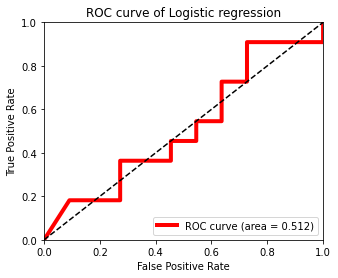

In [58]:
# AUC를 계산합니다.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

# ROC curve 그래프를 출력합니다.
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

<BarContainer object of 1129 artists>

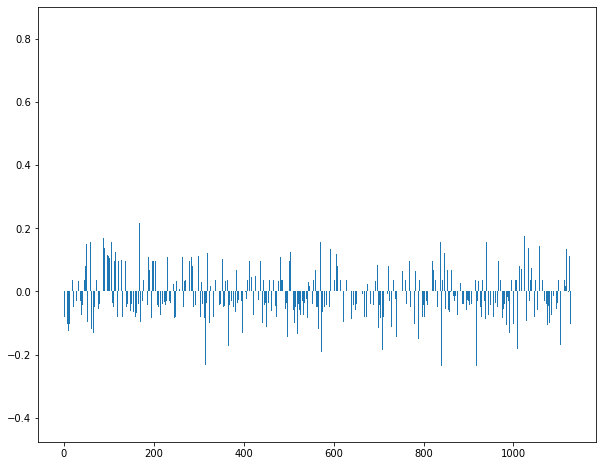

In [59]:
# 학습한 회귀 모델의 계수를 출력합니다.
plt.rcParams['figure.figsize'] = [10, 8]
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])

In [60]:
# 회귀 모델의 계수를 높은 순으로 정렬합니다. 
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)

In [61]:
# 회귀 모델의 계수를 index_vectorizer에 맵핑하여, 어떤 형태소인지 출력할 수 있게 합니다.
invert_index_vectorizer = {v: k for k, v in index_vectorizer.vocabulary_.items()}

# 계수가 높은 순으로, 피처에 형태소를 맵핑한 결과를 출력합니다. 계수가 높은 피처는 리뷰에 긍정적인 영향을 주는 형태소라고 할 수 있습니다.
print(str(invert_index_vectorizer)[:100]+'..')

{1116: '회/Noun', 712: '에서/Josa', 27: '가시/Noun', 10: '가/Josa', 80: '계속/Noun', 170: '나왔다/Verb', 608: '..


In [62]:
# 상위 20개 긍정 형태소를 출력합니다.
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

보기/Noun 0.8381084330278633
더/Noun 0.8210189062423867
좋아/Adjective 0.29631322443586666
용더/Verb 0.29631322443586666
무난/Noun 0.23003357966230634
가리비/Noun 0.22867797288839525
술/Noun 0.21985643283369488
나와서/Verb 0.2153321998949348
않은/Verb 0.20847598850118707
도/Noun 0.19726797920366088
최고/Noun 0.1960507421933841
회더/Noun 0.1868840530043213
다양한/Adjective 0.1868840530043213
고등어/Noun 0.1868840530043213
은/Josa 0.18133360651871858
ㅠ/KoreanParticle 0.1776741986560794
탕/Noun 0.1741298598902416
곳/Noun 0.17076246539008325
비/Noun 0.1662891812355671
중/Suffix 0.1577951244566447


In [63]:
# 상위 20개 부정 형태소를 출력합니다.
for coef in coef_pos_index[-20:]:
    print(invert_index_vectorizer[coef[1]], coef[0])

마쓰/Noun -0.16472426124343562
괜찮습니다/Adjective -0.16472426124343562
했는데/Verb -0.16948114473210132
매운탕/Noun -0.17392620565333278
너무/Adverb -0.17938252389364331
밥/Noun -0.18153820286365863
친구/Noun -0.18192615243986285
들/Suffix -0.18212350809554456
에/Josa -0.18376774881320015
세/Noun -0.18634705332120582
아예/Noun -0.19107582435343945
술맛나/Noun -0.19248820333439656
별/Modifier -0.2082596651434844
서/Josa -0.2165410399310784
참돔/Noun -0.2189150713848262
를/Josa -0.23322403325111632
입니다/Adjective -0.23522598292643437
좋은/Adjective -0.23532727593144012
안/VerbPrefix -0.31213263821717696
굳이/Noun -0.41327001180894063


In [64]:
noun_list = []
adjective_list = []

# 명사, 형용사별로 계수가 높은 상위 10개의 형태소를 추출합니다. 이는 리뷰에 긍정적인 영향을 주는 명사와 형용사를 순위별로 살펴보는 것이 됩니다.
for coef in coef_pos_index[:100]:
    pos_category = invert_index_vectorizer[coef[1]].split("/")[1]
    if pos_category == "Noun":
        noun_list.append((invert_index_vectorizer[coef[1]], coef[0]))
    elif pos_category == "Adjective":
        adjective_list.append((invert_index_vectorizer[coef[1]], coef[0]))

In [65]:
# 상위 10개의 명사를 출력합니다.
noun_list[:10]

[('보기/Noun', 0.8381084330278633),
 ('더/Noun', 0.8210189062423867),
 ('무난/Noun', 0.23003357966230634),
 ('가리비/Noun', 0.22867797288839525),
 ('술/Noun', 0.21985643283369488),
 ('도/Noun', 0.19726797920366088),
 ('최고/Noun', 0.1960507421933841),
 ('회더/Noun', 0.1868840530043213),
 ('고등어/Noun', 0.1868840530043213),
 ('탕/Noun', 0.1741298598902416)]

In [66]:
# 상위 10개의 형용사를 출력합니다.
adjective_list[:10]

[('좋아/Adjective', 0.29631322443586666),
 ('다양한/Adjective', 0.1868840530043213),
 ('나쁘지/Adjective', 0.1380437690152698),
 ('괜찮은/Adjective', 0.1380437690152698),
 ('비싼듯/Adjective', 0.12610603450721775),
 ('그래요/Adjective', 0.12536288129080475),
 ('있는/Adjective', 0.12071051593075854),
 ('그렇고/Adjective', 0.11971529652798882),
 ('괜찮긴/Adjective', 0.11971529652798882),
 ('괜찮아요/Adjective', 0.11501678983115317)]

In [67]:
noun_list[-10:]

[('연어/Noun', 0.10882666177381654),
 ('육질/Noun', 0.10825486156510283),
 ('아주/Noun', 0.10825486156510283),
 ('물고기/Noun', 0.10825486156510283),
 ('매우/Noun', 0.10825486156510283),
 ('다음/Noun', 0.10825486156510283),
 ('기회/Noun', 0.10825486156510283),
 ('기대/Noun', 0.10825486156510283),
 ('고기/Noun', 0.10825486156510283),
 ('구이/Noun', 0.10718207836439549)]

In [68]:
adjective_list[-10:]

[('좋았던것/Adjective', 0.11073038709487498),
 ('안되는지/Adjective', 0.11073038709487498),
 ('같음/Adjective', 0.11073038709487498),
 ('부실한/Adjective', 0.10886072475074245),
 ('부담스러웠다/Adjective', 0.10886072475074245),
 ('딱히/Adjective', 0.10886072475074245),
 ('깔끔하지도/Adjective', 0.10886072475074245),
 ('그랬습니다/Adjective', 0.10886072475074245),
 ('좋음/Adjective', 0.10825486156510283),
 ('급하기/Adjective', 0.10825486156510283)]